In [1]:
from fastai.vision import *
from pathlib import Path
from fastai.callbacks import *
import os
import matplotlib.pyplot as plt
from fastai.vision import Path

In [2]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [3]:
class Agent:
    def setPathSave(self, path):
        self.pathSave = path
    
    def load(self, modelName):
        self.net.load(pathSave/modelName)
        
    def readData(self, path):
        self.data = (ImageList.from_folder(path) #Donde encontrar la data? -> en "path" y sus carpetas
                    .split_by_folder(train= 'train', valid= 'valid')  #Como dividir la data entrenamiento/evaluacion? 
                    .label_from_folder()            #Como etiquetar? -> Dependiendo de los nombres de las carpetas
                    .transform(None , size = 256)     #Data augmentation? -> Usar tfms con un tamaño de imagen 256
                    .databunch(bs = 32)
                    .normalize(imagenet_stats))
                     
    def showData(self):
        self.data.show_batch(3, figsize=(6,6), hide_axis=False)
    
    def createNeuralNetwork(self):
        self.net = cnn_learner(self.data, models.resnet34, metrics=[accuracy])
    
    def showLearningRateGraphic(self):
        self.net.lr_find()
        self.net.recorder.plot()
    
    def train(self, epochs, minLearningRate, maxLearningRate):
         self.net.fit_one_cycle(epochs, max_lr=slice(minLearningRate, maxLearningRate), 
                               callbacks=[SaveModelCallback(self.net, every='improvement', monitor = 'accuracy', name= self.pathSave/'model')])
    
    def showConfusionMatrix(self):
        interp = ClassificationInterpretation.from_learner(self.net)
        interp.plot_confusion_matrix()
    
    def saveModel(self, filename):
        self.net.load(self.pathSave/filename)
        self.net.export(self.pathSave/Path(filename + '.pkl'))

In [4]:
agent = Agent()
pathData = Path('/home/graphter/Speech Emotion Recognition/RAVDESS/RAVDESS_spectrogram_Kaldi_4emotions')
pathSave = Path('/home/graphter/Speech Emotion Recognition/RAVDESS/RAVDESS_model_4emotions')

In [5]:
agent.setPathSave(pathSave)

In [6]:
agent.readData(pathData)

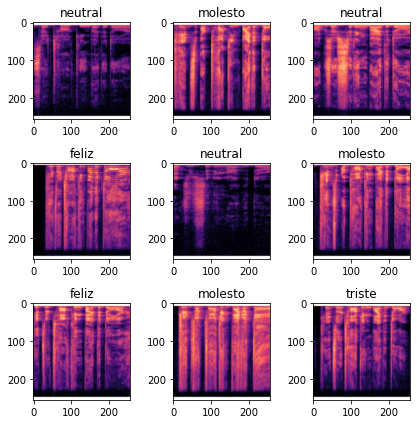

In [19]:
agent.showData()

In [20]:
agent.data.classes

['feliz', 'molesto', 'neutral', 'triste']

In [21]:
vc = pd.value_counts(agent.data.train_ds.y.items, sort=False)
vc.index = agent.data.classes
vc

feliz      152
molesto    152
neutral    152
triste     152
dtype: int64

In [7]:
agent.createNeuralNetwork()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


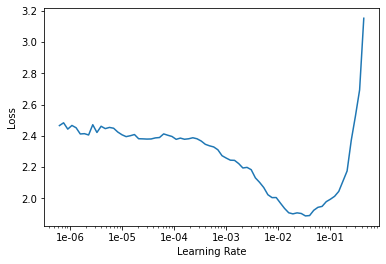

In [23]:
agent.showLearningRateGraphic()

In [24]:
agent.net.freeze()
agent.train(15, 1e-3, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.306793,2.171590,0.437500,00:07
1,1.690806,2.466687,0.575000,00:07
2,1.721292,6.105542,0.443750,00:07
3,2.252994,9.798002,0.331250,00:07
4,2.369723,4.540661,0.381250,00:07
5,2.498345,3.739633,0.456250,00:07
6,2.280253,3.770936,0.462500,00:07
7,1.893313,2.716545,0.606250,00:07
8,1.721933,2.715969,0.500000,00:07
9,1.384970,3.083297,0.562500,00:07


Better model found at epoch 0 with accuracy value: 0.4375.
Better model found at epoch 1 with accuracy value: 0.574999988079071.
Better model found at epoch 7 with accuracy value: 0.606249988079071.


In [31]:
agent.load('model-60.2%')

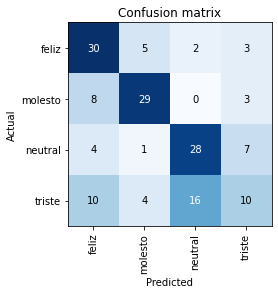

In [26]:
agent.showConfusionMatrix()

In [27]:
agent.net.validate(agent.net.data.train_dl)

[0.7530513, tensor(0.8289)]

In [28]:
agent.net.validate(agent.net.data.valid_dl)

[2.7165446, tensor(0.6062)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


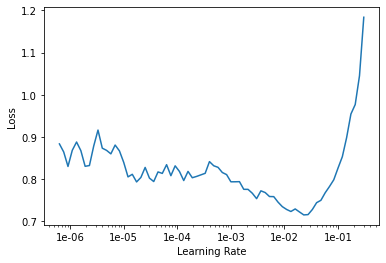

In [29]:
agent.showLearningRateGraphic()

In [32]:
agent.net.unfreeze()
agent.train(20, 1e-4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.852791,3.704826,0.443750,00:10
1,0.898088,3.456227,0.506250,00:09
2,0.835954,3.228723,0.650000,00:09
3,0.818718,3.944988,0.418750,00:09
4,0.898699,3.749823,0.462500,00:09
5,0.994664,3.332341,0.518750,00:09
6,0.946614,6.739190,0.437500,00:09
7,0.818118,2.015835,0.593750,00:09
8,0.640628,2.048574,0.506250,00:09
9,0.519526,1.962893,0.562500,00:09


Better model found at epoch 0 with accuracy value: 0.4437499940395355.
Better model found at epoch 1 with accuracy value: 0.5062500238418579.
Better model found at epoch 2 with accuracy value: 0.6499999761581421.
Better model found at epoch 10 with accuracy value: 0.6625000238418579.


In [34]:
agent.load('model-66.3%')

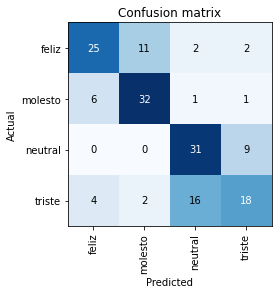

In [35]:
agent.showConfusionMatrix()

In [36]:
agent.net.validate(agent.net.data.train_dl)

[0.03565857, tensor(0.9885)]

In [37]:
agent.net.validate(agent.net.data.valid_dl)

[1.6025051, tensor(0.6625)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


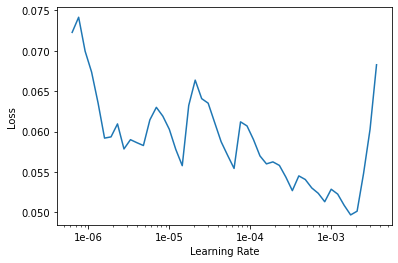

In [38]:
agent.showLearningRateGraphic()

In [39]:
agent.net.freeze()
agent.train(25, 1e-5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.062482,1.489347,0.700000,00:07
1,0.054738,1.458831,0.693750,00:07
2,0.063273,1.503841,0.693750,00:07
3,0.057746,1.501568,0.693750,00:07
4,0.066877,1.561666,0.687500,00:07
5,0.060657,1.544535,0.700000,00:07
6,0.048039,1.584972,0.681250,00:07
7,0.043836,1.615240,0.675000,00:07
8,0.040887,1.641402,0.681250,00:07
9,0.039409,1.687154,0.681250,00:07


Better model found at epoch 0 with accuracy value: 0.699999988079071.


In [40]:
agent.load('model-70%')

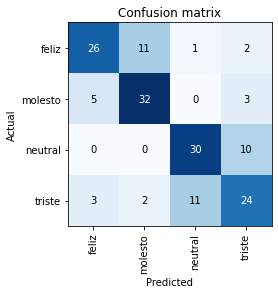

In [41]:
agent.showConfusionMatrix()

In [42]:
agent.net.freeze()
agent.train(25, 1e-5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.063713,1.463021,0.712500,00:07
1,0.061104,1.454431,0.693750,00:07
2,0.059733,1.474537,0.687500,00:07
3,0.053258,1.497025,0.700000,00:07
4,0.055918,1.559972,0.668750,00:07
5,0.056073,1.588236,0.681250,00:07
6,0.048732,1.643402,0.675000,00:07
7,0.052784,1.647074,0.675000,00:07
8,0.048097,1.669225,0.687500,00:07
9,0.042660,1.722048,0.668750,00:07


Better model found at epoch 0 with accuracy value: 0.7124999761581421.


In [8]:
agent.load('model-71.2%')

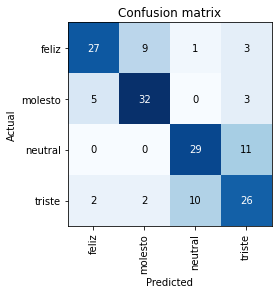

In [45]:
agent.showConfusionMatrix()

In [9]:
agent.net.validate(agent.net.data.valid_dl)

[1.4630212, tensor(0.7125)]

In [10]:
agent.net.validate(agent.net.data.train_dl)

[0.010287781, tensor(0.9984)]

In [11]:
agent.saveModel('model-71.2%')